In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import matplotlib.patches as mpatches
import seaborn as sns
chrom_list = ['chr'+str(i) for i in range(1,23)]
chrom_list.append('chrX')

from ATAC_plotting import *

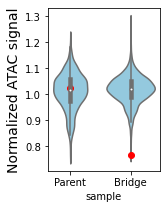

In [2]:
plt.rcParams["figure.figsize"] = (2,3)
fc_dict_bridge, m_bridge, i = getFC_dict(bridge_clones, int(10e6), 100)
fc_dict_par, m_par, i = getFC_dict(par_list, int(10e6), 100)
df = pd.DataFrame()
df['z'] = pd.DataFrame(fc_dict_bridge).mean(axis=1)
df['sample'] = 'Bridge'
df

df2 = pd.DataFrame()
df2['z'] = pd.DataFrame(fc_dict_par).mean(axis=1)
df2['sample'] = 'Parent'

df_both = df.append(df2)
df_both = df_both.reset_index(drop=True)

fig, ax = plt.subplots()
sns.violinplot(data=df_both, x=df_both['sample'], y=df_both['z'],
               ax=ax, color='skyblue', order=['Parent','Bridge'])
ax.set_ylabel('Normalized ATAC signal', fontsize=14)
plt.scatter([0,1], [pd.DataFrame(m_par).mean(axis=1), pd.DataFrame(m_bridge).mean(axis=1)], c='red')
# plt.savefig('fc_10Mb_rolling_100peak_cutoff.pdf', transparent=True, format='pdf')

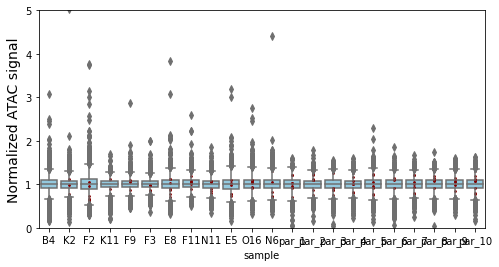

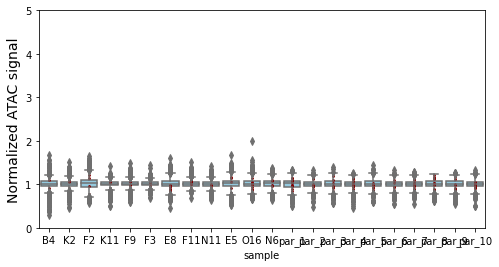

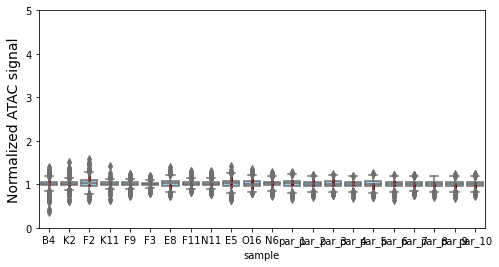

In [3]:
for window_size in [int(1e6), int(5e6), int(1e7)]:
    plotSignal(window_size)